<a href="https://colab.research.google.com/github/jimaguere/Electiva_1/blob/main/cluster_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import sys
sys.path.insert(0,'/content/drive/MyDrive/ELECTIVA 1')

import visuals as vs

In [41]:
import pandas as pd
import numpy as np

datos=pd.read_csv("/content/drive/MyDrive/ELECTIVA 1/consumo_clientes.csv",sep=",",index_col=0)
datos.head()

,IdCliente,cantidad_transacciones,val_compra_min,val_compra_max,prom_compras,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia,UltimaCompra,PrimeraCompra
0,12347,7,224.82,1294.32,615.714286,4310.00,11.237123,30.813225,7.604176,20.805104,29.540371,2,367
1,12348,4,227.44,892.80,449.310000,1797.24,38.016069,61.983931,0.000000,0.000000,0.000000,75,358
2,12349,1,1757.55,1757.55,1757.550000,1757.55,4.513101,52.138488,20.389178,12.245455,10.713778,18,18
3,12350,1,334.40,334.40,334.400000,334.40,11.692584,60.406699,0.000000,27.900718,0.000000,310,310
4,12352,7,144.35,840.30,340.815714,2385.71,1.299404,65.336105,14.691643,4.071325,14.601523,36,296


In [42]:
datos.count()

IdCliente                 4327
cantidad_transacciones    4327
val_compra_min            4327
val_compra_max            4327
prom_compras              4327
total                     4327
categoria_ropa            4327
categoria_lactenos        4327
categoria_carnes          4327
categoria_papeleria       4327
categoria_tecnologia      4327
UltimaCompra              4327
PrimeraCompra             4327
dtype: int64

**Creación de categorías de clientes.**

In [43]:
datos.describe()

,IdCliente,cantidad_transacciones,val_compra_min,val_compra_max,prom_compras,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia,UltimaCompra,PrimeraCompra
count,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000,4327.000000
mean,15302.292581,4.252369,242.291914,581.228840,373.767308,1945.963537,14.067670,32.532161,14.787031,21.637995,16.979507,92.205916,223.005315
std,1720.309986,7.632758,319.906197,1137.100553,441.371259,8398.120888,14.981732,18.564396,15.566675,16.797315,14.615593,100.186857,117.792982
min,12347.000000,1.000000,0.380000,2.900000,2.900000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13816.500000,1.000000,91.825000,219.075000,176.422500,303.930000,4.353161,21.246659,3.774427,11.185882,7.243708,17.000000,113.000000
50%,15301.000000,2.000000,166.780000,363.660000,288.712727,659.440000,10.452028,30.984795,11.460773,19.234450,14.840626,50.000000,249.000000
75%,16778.500000,5.000000,306.115000,614.260000,427.335000,1629.450000,18.673838,41.261782,20.734452,28.789051,23.186289,142.000000,326.000000
max,18287.000000,205.000000,6207.670000,30757.000000,12425.450000,279765.020000,100.000000,100.000000,100.000000,100.000000,100.000000,373.000000,373.000000


Implementación: detección de valores atípicos

In [44]:
list_cols=['cantidad_transacciones','total','categoria_ropa',
           'categoria_lactenos','categoria_carnes','categoria_papeleria','categoria_tecnologia']
datos=datos[list_cols]
outliers  = []
# For each feature find the data points with extreme high or low values
for feature in datos.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
  
    Q1 = datos[feature].quantile(0.25)
    print("Q1:"+str(Q1))
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = datos[feature].quantile(0.75)
    print("Q3:"+str(Q3))
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(datos[~((datos[feature] >= Q1 - step) & (datos[feature] <= Q3 + step))])
    data_outliers=datos[~((datos[feature] >= Q1 - step) & (datos[feature] <= Q3 + step))]
    outliers.extend(list(data_outliers.index.values))


# Remove the outliers, if any were specified
good_data = datos.drop(datos.index[outliers]).reset_index(drop = True)

Q1:1.0
Q3:5.0
Data points considered outliers for the feature 'cantidad_transacciones':


,cantidad_transacciones,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia
38,12,2998.28,27.078859,36.079019,3.136798,18.513281,15.192043
54,19,123638.18,11.748572,32.184087,11.947620,17.562229,26.557492
68,15,6416.39,4.732256,31.534866,24.616646,22.674744,16.441488
74,18,4896.66,20.152512,53.392721,7.401984,13.988106,5.064677
98,30,19047.02,11.424044,55.057169,3.823170,13.420105,16.275512
...,...,...,...,...,...,...,...
4281,14,6327.99,4.758857,20.817195,8.502700,44.772353,21.148896
4283,12,5392.82,10.090639,24.493122,6.351964,53.260261,5.804013
4287,20,7276.90,0.253679,41.024612,42.600558,3.946186,12.174965
4297,17,2058.09,9.964579,24.663644,17.686301,24.989675,22.695800


Q1:303.93
Q3:1629.4499999999998
Data points considered outliers for the feature 'total':


,cantidad_transacciones,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia
0,7,4310.00,11.237123,30.813225,7.604176,20.805104,29.540371
9,1,6207.67,5.089832,26.686341,25.189000,14.684737,28.350089
11,4,6203.03,2.520704,42.861150,23.648120,11.479551,19.490475
14,10,5154.58,5.426242,41.458276,9.085124,21.888107,22.142250
26,1,4008.62,15.080003,34.342492,12.641508,22.231092,15.704906
...,...,...,...,...,...,...,...
4281,14,6327.99,4.758857,20.817195,8.502700,44.772353,21.148896
4283,12,5392.82,10.090639,24.493122,6.351964,53.260261,5.804013
4284,11,5192.10,8.608078,49.799310,4.007049,24.090638,13.494925
4287,20,7276.90,0.253679,41.024612,42.600558,3.946186,12.174965


Q1:4.353160902853863
Q3:18.673837735729514
Data points considered outliers for the feature 'categoria_ropa':


,cantidad_transacciones,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia
16,4,1313.10,48.543142,42.508568,2.490290,3.819206,2.638794
41,4,1108.65,45.951382,43.241781,0.000000,6.788436,4.018401
201,7,1032.58,44.296810,42.541982,0.000000,8.803192,4.358016
217,8,3214.81,44.016287,35.646586,3.882033,16.455094,0.000000
245,1,114.00,42.631579,13.157895,15.657895,0.000000,28.552632
...,...,...,...,...,...,...,...
4219,2,1014.90,41.247414,38.947680,0.000000,12.001182,7.803725
4223,2,160.35,41.159963,14.593078,11.131899,33.115061,0.000000
4252,1,49.80,100.000000,0.000000,0.000000,0.000000,0.000000
4257,1,207.80,52.358037,0.000000,47.641963,0.000000,0.000000


Q1:21.246659158039744
Q3:41.26178208005024
Data points considered outliers for the feature 'categoria_lactenos':


,cantidad_transacciones,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia
13,1,189.90,0.000000,81.358610,0.000000,18.641390,0.000000
17,2,641.38,0.785806,74.938414,0.000000,16.558047,7.717734
79,1,133.40,0.000000,77.511244,0.000000,22.488756,0.000000
82,1,449.45,8.276783,71.732117,3.671154,13.015908,3.304038
95,8,1212.05,0.000000,82.467720,11.220659,6.311621,0.000000
...,...,...,...,...,...,...,...
4199,1,76.32,0.000000,100.000000,0.000000,0.000000,0.000000
4278,1,298.92,0.000000,100.000000,0.000000,0.000000,0.000000
4285,1,93.75,0.000000,84.000000,0.000000,0.000000,16.000000
4291,1,440.00,0.000000,100.000000,0.000000,0.000000,0.000000


Q1:3.7744274967312466
Q3:20.734451806559466
Data points considered outliers for the feature 'categoria_carnes':


,cantidad_transacciones,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia
10,2,1168.06,0.000000,26.895879,70.304608,1.515333,1.284181
72,2,7829.89,0.000000,25.781205,50.669294,15.330994,8.218506
202,10,2581.04,4.271921,18.269380,64.532127,9.059914,3.866658
280,4,582.10,10.616733,8.555231,56.777186,0.000000,24.050850
292,13,4254.38,3.610397,15.233242,54.231169,10.692510,16.232683
...,...,...,...,...,...,...,...
4192,1,754.64,21.673911,10.638185,57.451235,0.000000,10.236669
4217,1,152.65,23.190305,23.092041,47.232231,0.000000,6.485424
4257,1,207.80,52.358037,0.000000,47.641963,0.000000,0.000000
4265,1,160.42,1.944895,11.625732,70.408927,3.677846,12.342601


Q1:11.185882298563879
Q3:28.789050998141825
Data points considered outliers for the feature 'categoria_papeleria':


,cantidad_transacciones,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia
24,2,455.42,5.599227,17.566203,6.982566,58.917044,10.934961
43,1,225.60,0.000000,41.888298,0.000000,58.111702,0.000000
133,2,1312.06,27.427099,10.746460,0.000000,61.826441,0.000000
177,1,160.54,14.096175,15.516382,6.197832,58.022923,6.166687
190,1,144.00,0.000000,27.777778,0.000000,72.222222,0.000000
...,...,...,...,...,...,...,...
4244,1,104.00,0.000000,0.000000,0.000000,100.000000,0.000000
4246,6,1314.17,2.744698,30.951095,0.000000,65.413911,0.890296
4260,1,896.00,0.000000,36.250000,0.000000,63.750000,0.000000
4273,1,299.34,0.000000,16.736821,11.024253,60.780384,11.458542


Q1:7.2437083881867945
Q3:23.18628912760157
Data points considered outliers for the feature 'categoria_tecnologia':


,cantidad_transacciones,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia
44,1,409.70,0.000000,4.393459,0.000000,0.000000,95.606541
127,1,176.50,14.447592,10.198300,19.263456,0.000000,56.090652
149,2,716.35,5.695540,9.576324,27.626160,8.543310,48.558665
165,5,11990.96,0.680513,21.284701,0.000000,0.000000,78.034786
255,9,4863.88,0.407082,10.111269,0.000000,0.943691,88.537957
...,...,...,...,...,...,...,...
4237,3,1280.21,0.000000,13.310316,12.068333,26.608916,48.012435
4286,2,769.20,1.996880,6.151846,14.151066,17.020281,60.679927
4308,3,2338.60,0.000000,4.874711,5.079962,22.847002,67.198324
4315,1,138.90,14.686825,28.509719,0.000000,0.000000,56.803456


In [45]:
good_data.count()

cantidad_transacciones    3008
total                     3008
categoria_ropa            3008
categoria_lactenos        3008
categoria_carnes          3008
categoria_papeleria       3008
categoria_tecnologia      3008
dtype: int64

**Antes de continuar el análisis, creo una matriz donde se estandarizan estos datos**

In [46]:
from sklearn.preprocessing import StandardScaler
# 
scaler = StandardScaler()
scaler.fit(good_data)
scaled_matrix = scaler.transform(good_data)

df_scaled_matrix=pd.DataFrame(scaled_matrix,columns=good_data.columns)
df_scaled_matrix.head()

,cantidad_transacciones,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia
0,0.462888,1.058241,2.670996,2.051088,-1.312962,-1.865670,-1.644224
1,-0.874641,1.009411,-0.915161,1.325617,0.568844,-0.801790,-0.613574
2,-0.874641,-0.741469,-0.146669,1.934868,-1.312962,0.558332,-1.644224
3,1.800418,1.782227,-1.259155,2.298096,0.042993,-1.511955,-0.239578
4,-0.874641,-1.043381,-1.398243,1.739314,0.750698,-0.137840,-1.644224


A continuación, crearé grupos de clientes. En la práctica, antes de crear estos clústeres, es interesante definir una base de dimensión más pequeña que permita describir la matriz scaled_matrix

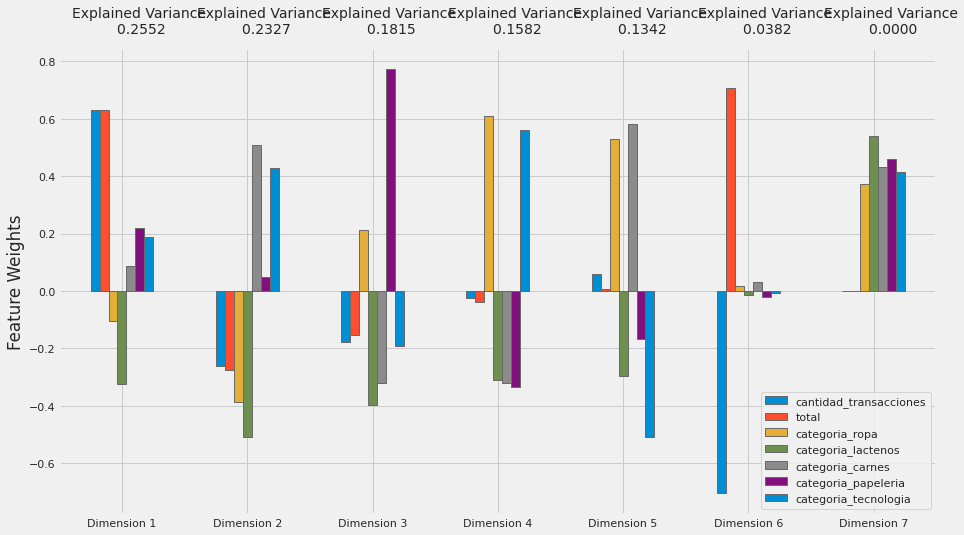

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(df_scaled_matrix.keys())).fit(df_scaled_matrix)

pca_samples = pca.transform(df_scaled_matrix)

# Generate PCA results plot
pca_results = vs.pca_results(df_scaled_matrix, pca)

In [48]:
dimensiones=['Dimension 1', 'Dimension 2','Dimension 3','Dimension 4','Dimension 5']
pca = PCA(n_components=len(dimensiones)).fit(scaled_matrix)
reduced_data = pca.transform(scaled_matrix)
pca_samples =  pca.transform(scaled_matrix)
reduced_data = pd.DataFrame(reduced_data, columns = dimensiones)
reduced_data.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,-0.815467,-3.955421,-1.200292,1.066177,1.219929
1,-0.489031,-0.380657,-1.407459,-1.244499,-0.147392
2,-1.927941,-1.839451,0.642423,-1.327613,-0.736724
3,1.275891,-1.797539,-2.922223,-1.239475,-0.833371
4,-1.897459,-0.152963,-0.701616,-2.446571,-0.021761


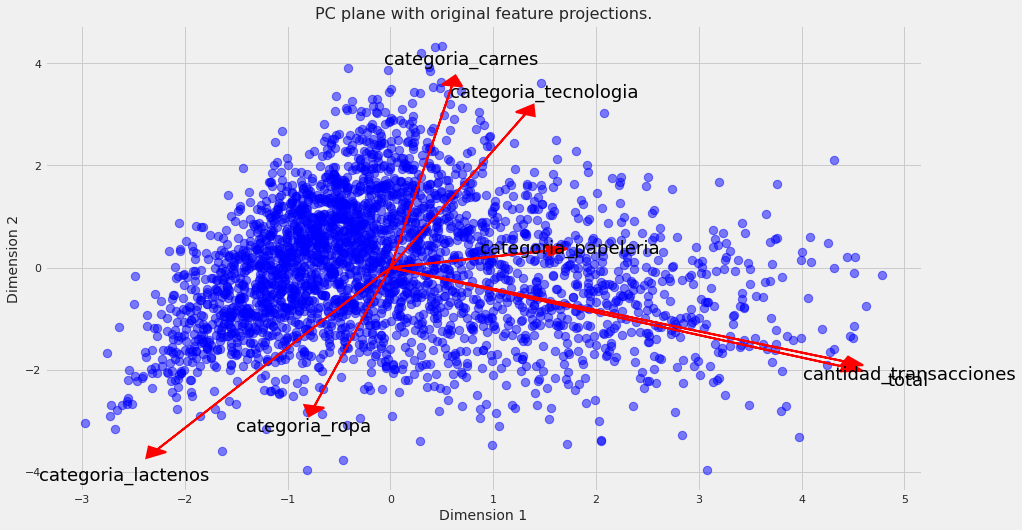

In [49]:
vs.biplot(good_data, reduced_data, pca)

**En este punto, defino grupos de clientes a partir de la matriz estandarizada que se definió anteriormente y usando el algoritmo k-means de scikit-learn. Elijo la cantidad de grupos en función de la puntuación de silueta.**

In [50]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


#K=5    0.184
#K=4    0.181
#K=3    0.186
#K=2    0.204


n_clusters = 5
kmeans = KMeans( n_clusters = n_clusters, n_init=100)
kmeans.fit(df_scaled_matrix)

clusters_clients = kmeans.predict(df_scaled_matrix)

silhouette_avg = silhouette_score(df_scaled_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.184


**Miro la cantidad de clientes en cada grupo:**

In [51]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb. de clients']).T

,2,3,1,0,4
nb. de clients,783,595,545,544,541


In [52]:

import seaborn as sns
import matplotlib.pyplot as plt

matrix_3D = pca.fit_transform(df_scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

In [53]:

mat.head()

,0,1,2,3,4,cluster
0,-0.815467,-3.955421,-1.200292,1.066177,1.219929,4
1,-0.489031,-0.380657,-1.407459,-1.244499,-0.147392,1
2,-1.927941,-1.839451,0.642423,-1.327613,-0.736724,1
3,1.275891,-1.797539,-2.922223,-1.239475,-0.833371,0
4,-1.897459,-0.152963,-0.701616,-2.446571,-0.021761,1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


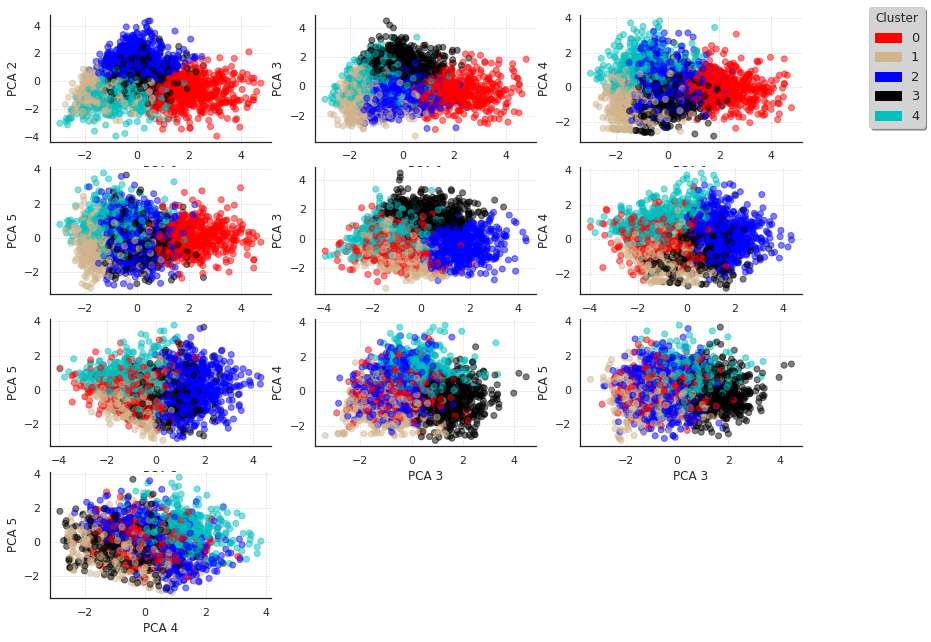

In [54]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(5):
    for iy in range(ix+1, 5):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

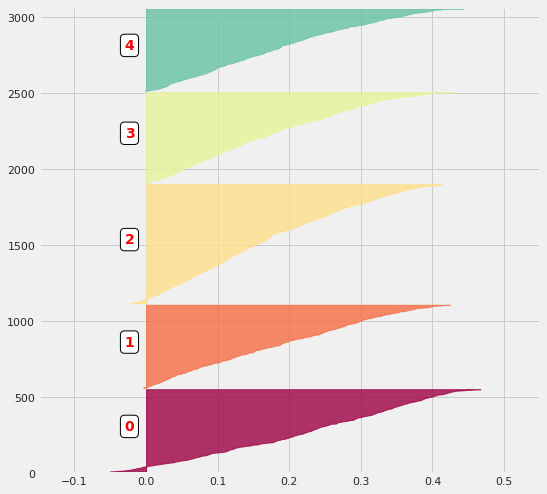

In [55]:

import matplotlib as mpl
import matplotlib.cm as cm
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  


sample_silhouette_values = silhouette_samples(df_scaled_matrix, clusters_clients)
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(df_scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(df_scaled_matrix), sample_silhouette_values, clusters_clients)

In [56]:
df_scaled_matrix=good_data.copy()
df_scaled_matrix.loc[:, 'cluster'] = clusters_clients
#good_data.loc[:, 'sil'] = sample_silhouette_values
df_scaled_matrix.head()

,cantidad_transacciones,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia,cluster
0,4,1797.24,38.016069,61.983931,0.000000,0.000000,0.000000,4
1,1,1757.55,4.513101,52.138488,20.389178,12.245455,10.713778,1
2,1,334.40,11.692584,60.406699,0.000000,27.900718,0.000000,1
3,7,2385.71,1.299404,65.336105,14.691643,4.071325,14.601523,0
4,1,89.00,0.000000,57.752809,22.359551,19.887640,0.000000,1


In [57]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(df_scaled_matrix[df_scaled_matrix['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = df_scaled_matrix[df_scaled_matrix['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
print('number of customers:', merged_df['size'].sum())

merged_df

number of customers: 3008


,cantidad_transacciones,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia,size
cluster,,,,,,,,
0.0,6.496324,2294.560112,12.563145,32.422102,13.574538,23.454555,17.993872,544
1.0,2.077064,601.617451,8.398707,52.812590,11.888658,15.449968,11.452807,545
2.0,2.191571,623.180142,8.545285,26.472284,23.060428,16.731121,25.193787,783
3.0,2.132773,643.724976,11.064746,27.660772,11.091256,36.582899,13.600327,595
4.0,2.325323,686.967597,26.999656,35.326993,7.896060,15.799667,13.980184,541


In [58]:
df_grupos=merged_df.copy()

my_palette = plt.cm.get_cmap("Set2", len(df_grupos.index))

df_grupos['group']=df_grupos.index
df_grupos['group']=df_grupos.group.astype(str)
df_grupos.reset_index(inplace=True)
df_grupos.drop(columns=['cluster','size'],inplace=True)
merged_df.drop(columns=['size'],inplace=True)
df_grupos

,cantidad_transacciones,total,categoria_ropa,categoria_lactenos,categoria_carnes,categoria_papeleria,categoria_tecnologia,group
0,6.496324,2294.560112,12.563145,32.422102,13.574538,23.454555,17.993872,0.0
1,2.077064,601.617451,8.398707,52.812590,11.888658,15.449968,11.452807,1.0
2,2.191571,623.180142,8.545285,26.472284,23.060428,16.731121,25.193787,2.0
3,2.132773,643.724976,11.064746,27.660772,11.091256,36.582899,13.600327,3.0
4,2.325323,686.967597,26.999656,35.326993,7.896060,15.799667,13.980184,4.0


In [59]:
class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

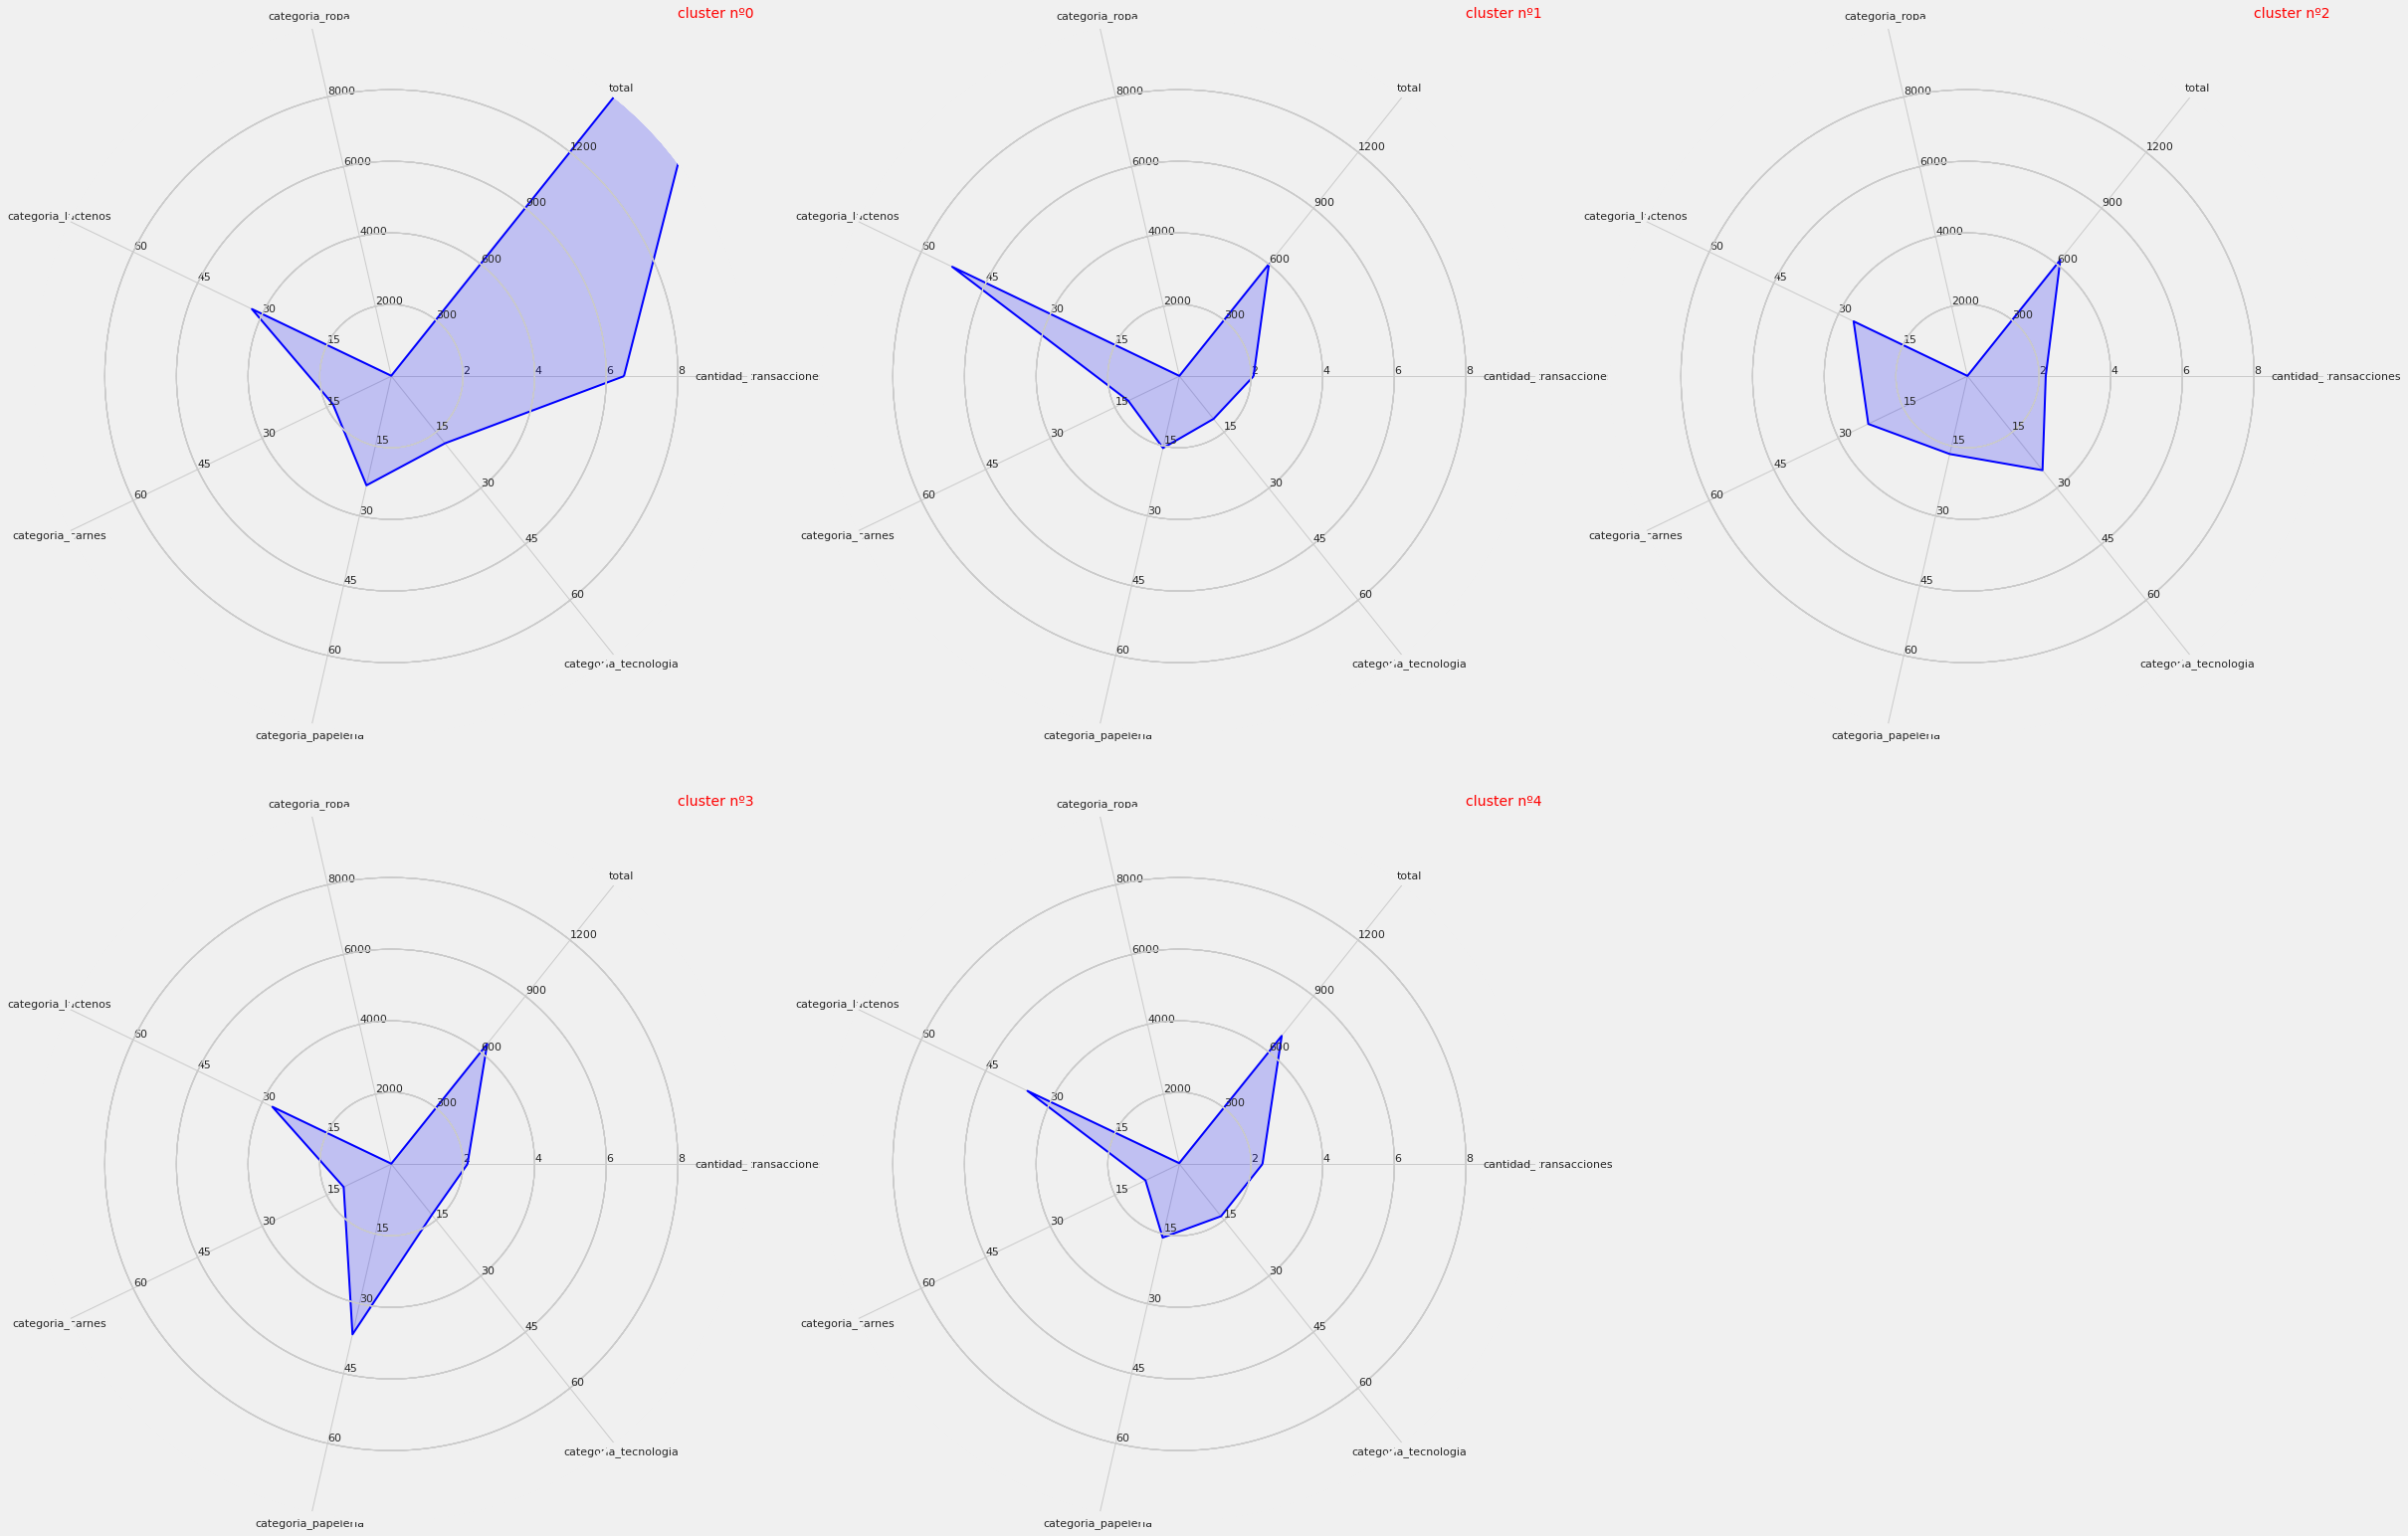

In [61]:
from math import pi

def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]



fig = plt.figure(figsize=(20,20))
n_clusters=5

attributes = merged_df.columns
ranges = [[0.01, 10], [0.01, 1500], [0.01, 10000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_groups = n_clusters ; i_cols = 2
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1